In [1]:
# Biblotecas de manipulação de dados
import numpy as np
import pandas as pd
# Bibliotecas de visualização
import seaborn as sns
import matplotlib.pyplot as plt
# Testes estatísticos
from scipy.stats import ttest_ind
# Bibliotecas Locais
from carga import *
from tratamentos import *
from categorizacao import *

pfEnade = doCarga('microdados_enade_2019.txt')
# pfEnade = pfEnade.query('QE_I08 != " "')
# pfEnade = pfEnade.query('QE_I23 != " "')
#pfEnade['NT_GER'].fillna(0, inplace=True)
pfEnade['NT_GER'].dropna(inplace=True)
pfEnade['QE_I08'].dropna(inplace=True)

dfRemove = pfEnade.loc[(pfEnade['QE_I08'] == ' ')]
pfEnade = pfEnade.drop(dfRemove.index)
dfRemove = pfEnade.QE_I08.dropna()

# TRATAMENTOS 
pfEnade = doIdade(pfEnade)
pfEnade = doNota(pfEnade)
pfEnade = doVazios(pfEnade)
pfEnade = doPublicoPrivada(pfEnade)
pfEnade = doHumanasExatas(pfEnade)
pfEnade = doRenda(pfEnade)
pfEnade = doMigracao(pfEnade)
# TRATAMENTOS - Dicionários
pfEnade = doRenda(pfEnade)
#pfEnade['Renda'].value_counts().sort_index()
# pfEnade.isna().sum()    # Mostra se há vazios
pfEnade = doEscolaridade(pfEnade)

In [2]:
# Renda Familiar X Nota
tmp = pfEnade.groupby('QE_I08')['NT_GER'].agg(['mean', 'std', 'count']).sort_index()
tmp.index = pd.Series(tmp.index).replace(doRendaDIC())
tmp.index.name = 'Qual a renda total de sua família, incluindo seus rendimentos?'
tmp 

,mean,std,count
"Qual a renda total de sua família, incluindo seus rendimentos?",,,
,NaN,NaN,0
"Até 1,5 salário mínimo (até R$ 1.431,00)",38.952305,16.183434,70974
"De 1,5 a 3 salários mínimos (R$ 1.431,01 a R$ 2.862,00)",40.388231,16.128882,109810
"De 3 a 4,5 salários mínimos (R$ 2.862,01 a R$ 4.293,00)",41.939163,16.592564,79438
"De 4,5 a 6 salários mínimos (R$ 4.293,01 a R$ 5.724,00)",43.400706,16.908141,44614
"De 6 a 10 salários mínimos (R$ 5.724,01 a R$ 9.540,00)",45.390344,17.258026,47357
"De 10 a 30 salários mínimos (R$ 9.540,01 a R$ 28.620,00)",48.725288,17.422918,31149
"Acima de 30 salários mínimos (mais de R$ 28.620,00)",50.567785,17.580247,6320


<AxesSubplot:>

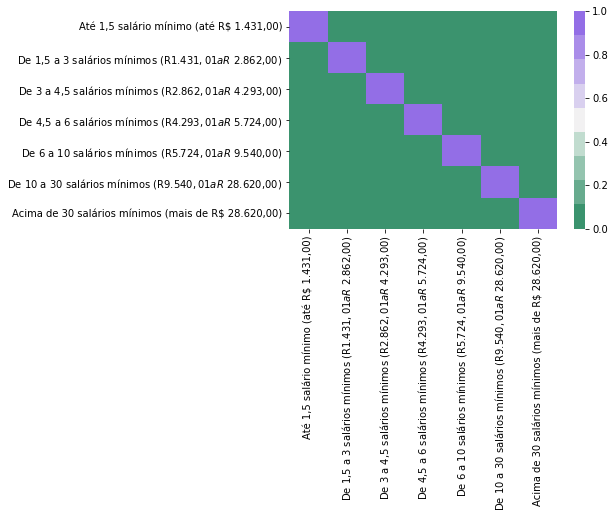

In [5]:
# CORRELAÇÂO - Renda Familiar e Nota
lista_de_listas = []
valores = sorted(pfEnade['QE_I08'].dropna().unique().tolist())
for i in valores:
    lista_de_listas.append([])
    for j in valores:
        t_res = ttest_ind(pfEnade.query(f'QE_I08 == @i')['NT_GER'], pfEnade.query(f'QE_I08 == @j')['NT_GER'])
        lista_de_listas[-1].append(t_res.pvalue)

valores = pd.Series(valores).replace(doRendaDIC())
tmp = pd.DataFrame(lista_de_listas, index=valores, columns=valores)    

sns.heatmap(tmp, cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9))

In [9]:
# Horas de Estudo X Renda Familiar
tmp = pfEnade.groupby('QE_I23')['NT_GER'].agg(['mean', 'std', 'count']).sort_index()
tmp.index = pd.Series(tmp.index).replace(doHEstudoDIC())
tmp.index.name = 'Horas de estudo extra classe?'
tmp 

,mean,std,count
Horas de estudo extra classe?,,,
Não Informado,42.533333,14.026499,6
"Nenhuma, apenas assisto às aulas",36.740648,17.560791,14222
De uma a três,39.180157,16.139952,154817
De quatro a sete,42.822043,16.498981,117367
De oito a doze,45.613756,16.732027,52690
Mais de doze,48.191042,17.221623,50560


In [ ]:
# CORRELAÇÂO entre os grupos de horas de estudos
lista_de_listas = []
valores = sorted(pfEnade['QE_I23'].dropna().unique().tolist())
for i in valores:
    lista_de_listas.append([])
    for j in valores:
        t_res = ttest_ind(pfEnade.query(f'QE_I23 == @i')['NT_GER'], pfEnade.query(f'QE_I23 == @j')['NT_GER'])
        lista_de_listas[-1].append(t_res.pvalue)

valores = pd.Series(valores).replace(doHEstudoDIC())
tmp = pd.DataFrame(lista_de_listas, index=valores, columns=valores)    

sns.heatmap(tmp, cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9))

In [ ]:
# AGRUPANDO Renda X Horas de Estudo X Nota Média
tmp = pfEnade.groupby(['QE_I08', 'QE_I23'])['NT_GER'].agg(['mean']).unstack()
    
tmp.index = pd.Series(tmp.index).replace(doRendaDIC())
tmp.index.name = 'Qual a renda total de sua família, incluindo seus rendimentos?'

tmp.columns = tmp.columns.droplevel(0)
tmp.columns = pd.Series(tmp.columns).replace(doHEstudoDIC())
tmp.columns.name = 'Quantas horas por semana, aproximadamente, você dedicou aos estudos, excetuando as horas de aula?'
    
tmp 

In [ ]:
tmp = pfEnade.groupby(['QE_I08', 'QE_I23'])['NT_GER'].agg(['mean']).unstack() #.where(pfEnade.QE_I08 != ' ')
    
#tmp.index = pd.Series(tmp.index).replace(doRendaDIC())
tmp.index.name = 'Qual a renda total de sua família, incluindo seus rendimentos?'

tmp.columns = tmp.columns.droplevel(0)

#tmp.columns = pd.Series(tmp.columns).replace(doHEstudoDIC())
tmp.columns.name = 'Quantas horas por semana, aproximadamente, você dedicou aos estudos, excetuando as horas de aula?'
    
ax = tmp.plot(figsize=(15,5)) 
ax.set_title('Nota X Renda X Horas', fontsize=20)

textoRenda = ""
for key, value in doRendaDIC().items():
    textoRenda = textoRenda + "{k} : {v}\n".format(k=key, v=value)
ax.text(0.05, 0.6, textoRenda, transform=ax.transAxes, fontsize=8)


textoEstudo = ""
for key, value in doRendaDIC().items():
    textoEstudo = textoEstudo + "{k} : {v}\n".format(k=key, v=value)
ax.legend(textoEstudo)


In [ ]:
sns.heatmap(data=tmp, cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9), )

In [ ]:
# Gênero X Nota
tmp = pfEnade.groupby('TP_SEXO')['NT_GER'].agg(['mean', 'std', 'count']).sort_index()
tmp.index = pd.Series(tmp.index).replace(doSexoDIC())
tmp.index.name = 'Sexo'
tmp 

In [ ]:
# Gênero X Nota
tmp.div(tmp.iloc[1])

In [ ]:
# Sexo X Renda
SxR = pfEnade.groupby(['TP_SEXO', 'QE_I08'])['NT_GER'].agg(['count']).unstack()
    
SxR.index = pd.Series(SxR.index).replace(doSexoDIC())
SxR.index.name = 'Sexo'

SxR.columns = SxR.columns.droplevel(0)
SxR.columns = pd.Series(SxR.columns).replace(doRendaDIC())
SxR.columns.name = 'Qual a renda total de sua família, incluindo seus rendimentos?'
    
SxR 

In [ ]:
# BUG
fig, ax = plt.subplots(figsize=(16,8))
plt.suptitle('Título Plot')
SxR.filter(items=['TP_SEXO', 'QE_I08', 'NT_GER'])\
    .groupby(['TP_SEXO', 'QE_I08'])\
    .mean().sort_values(by='NT_GER', ascending=False)\
    .unstack().plot(ax=ax)

In [ ]:
SxR.div(SxR.iloc[1])

In [6]:
# Migrado X Renda X Nota
xq = pfEnade.where(pfEnade.Migrado == 1)
xq = xq.where(xq.NT_GER != ' ')
xq = xq.where(xq.NT_GER > 0)
xq = xq.where(xq.QE_I08 != ' ')

MxR = xq.groupby(['NT_GER', 'QE_I08'])['Migrado'].agg(['count']).unstack()
    
MxR.index = pd.Series(MxR.index).replace(doMigradoDIC())
MxR.index.name = 'Migrado'

MxR.columns = MxR.columns.droplevel(0)
MxR.columns = pd.Series(MxR.columns).replace(doRendaDIC())
MxR.columns.name = 'Qual a renda total de sua família, incluindo seus rendimentos?'
    
MxR 

"Qual a renda total de sua família, incluindo seus rendimentos?",,"Até 1,5 salário mínimo (até R$ 1.431,00)","De 1,5 a 3 salários mínimos (R$ 1.431,01 a R$ 2.862,00)","De 3 a 4,5 salários mínimos (R$ 2.862,01 a R$ 4.293,00)","De 4,5 a 6 salários mínimos (R$ 4.293,01 a R$ 5.724,00)","De 6 a 10 salários mínimos (R$ 5.724,01 a R$ 9.540,00)","De 10 a 30 salários mínimos (R$ 9.540,01 a R$ 28.620,00)","Acima de 30 salários mínimos (mais de R$ 28.620,00)"
Migrado,,,,,,,,
0.4,0,0,0,1,0,0,0,0
0.8,0,0,0,0,0,0,1,0
1.0,0,0,0,1,0,0,0,0
1.5,0,1,0,0,0,0,0,0
2.2,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
88.9,0,0,0,0,0,1,0,0
89.2,0,0,1,0,0,0,0,0
89.6,0,0,0,0,0,1,0,0


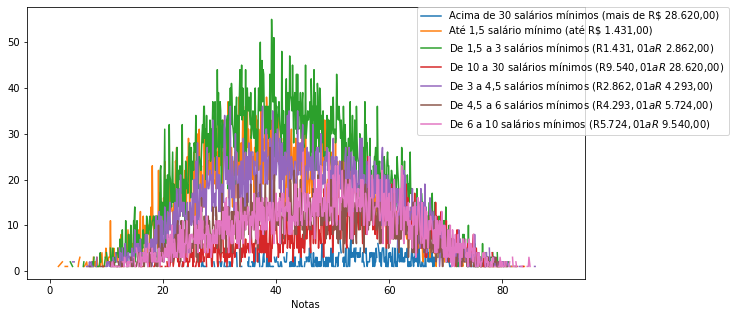

In [11]:
#tmp = pfEnade.groupby(['QE_I08', 'QE_I23'])['NT_GER'].agg(['mean']).unstack() #.where(pfEnade.QE_I08 != ' ')
# MxR = pfEnade.groupby(['NT_GER', 'QE_I08'])['Migrado'].agg(['count']).unstack().where('NT_GER > 0')
#MxR = pfEnade.groupby(['NT_GER', 'QE_I08'])['Migrado'].agg(['count']).unstack().where(pfEnade.NT_GER != ' ')
xq = pfEnade.where(pfEnade.Migrado == 1)
xq = xq.where(xq.NT_GER != ' ')
xq = xq.where(xq.NT_GER > 0)
xq = xq.where(xq.QE_I08 != ' ')
MxR = xq.groupby(['NT_GER',  'RendaDIC'])['Migrado']\
    .agg(['count'])\
    .unstack()
    
MxR.index.name = 'Notas'


MxR.columns = MxR.columns.droplevel(0)
MxR.columns.name = 'Renda'
    
ax = MxR.plot(figsize=(10,5)) 
ax.legend(bbox_to_anchor=(0.7, 1), loc=0, borderaxespad=0.)
#ax.set_title('Nota X Renda X Migração', fontsize=20)

# textoRenda = ""
# for key, value in doRendaDIC().items():
#    textoRenda = textoRenda + "{k} : {v}\n".format(k=key, v=value)
#ax.text(0.05, 0.6, textoRenda, transform=ax.transAxes, fontsize=8)

#textoEstudo = ""
#for key, value in doRendaDIC().items():
#    textoEstudo = textoEstudo + "{k} : {v}\n".format(k=key, v=value)
#ax.legend(textoEstudo)